<a href="https://colab.research.google.com/github/allanah1/RNN_Stock_Data/blob/main/test_RNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
from keras.layers import Dense, Activation, Flatten, BatchNormalization, Dropout, GRU, LSTM, Bidirectional
from keras.models import Sequential
from tensorflow.keras import layers

In [ ]:
#from google.colab import drive
#drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
#model = tf.keras.models.load_model('/content/gdrive/MyDrive/Colab Notebooks/657 Assignment 3/models/Group40_RNN_model') #For Colab

model = tf.keras.models.load_model('models/Group40_RNN_model') #Locally Run

In [ ]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
bidirectional_18 (Bidirectio (None, 1, 512)            414720    
_________________________________________________________________
dropout_28 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
bidirectional_19 (Bidirectio (None, 1, 512)            1182720   
_________________________________________________________________
dropout_29 (Dropout)         (None, 1, 512)            0         
_________________________________________________________________
bidirectional_20 (Bidirectio (None, 512)               1182720   
_________________________________________________________________
dropout_30 (Dropout)         (None, 512)               0         
_________________________________________________________________
dense_10 (Dense)             (None, 1)               

In [ ]:
#Load the Test Data
#test = pd.read_csv('/content/gdrive/MyDrive/Colab Notebooks/657 Assignment 3/data/test_data_RNN.csv') #colab - Delete before submission

test = pd.read_csv('data/test_data_RNN.csv') #locally run


In [ ]:
test.head()

,Volume_Previous_Day,Volume_Previous_2Days,Volume_Previous_3Days,Open_Previous_Day,Open_Previous_2Days,Open_Previous_3Days,High_Previous_Day,High_Previous_2Days,High_Previous_3Days,Low_Previous_Day,Low_Previous_2Days,Low_Previous_3Days,Next_Open
0,32661520.0,51314210.0,34380630.0,353.25,364.41,360.70,362.17,365.32,365.00,351.28,353.02,357.57,365.12
1,20182050.0,16365720.0,15515000.0,189.69,191.78,189.75,192.55,191.80,191.87,189.69,189.93,189.20,190.68
2,29264340.0,45247890.0,32503750.0,273.61,276.28,277.95,277.90,277.25,281.68,272.20,265.43,276.85,277.20
3,26781730.0,30148360.0,33770220.0,105.58,104.81,106.05,106.00,105.84,106.07,105.28,104.77,104.00,107.52
4,19029420.0,29282700.0,30889270.0,227.03,225.82,226.27,227.79,228.06,229.93,225.64,224.33,225.84,232.95


In [ ]:
#Preprocess the test data
test_X = test.iloc[:,:-1].values
test_y = test.iloc[:,-1]

normalizer = MinMaxScaler()
test_X = normalizer.fit_transform(test_X)
test_X = test_X.reshape((len(test_X), 1, test_X.shape[1]))

In [ ]:
loss, mse, mape = model.evaluate(test_X, test_y)
print('loss as mse: ', loss)
print('loss as rmse: ' + str(np.sqrt(loss)))

12/12 [==============================] - 0s 12ms/step - loss: 106.2025 - mse: 106.2025 - mape: 3.4169
loss as mse:  106.20250701904297
loss as rmse: 10.305460058582682


**Output Comment** </br>
Our model performs well on the test set. This shows we are off the real test 
set next open day prices on an average by 3.4% and 10.3 units where units are the currency the stock market prices are in.

In [ ]:
predicted_prices = model.predict(test_X)

Text(0.5, 1.0, 'Predicted and True Prices of Stock Market Next Open Values')

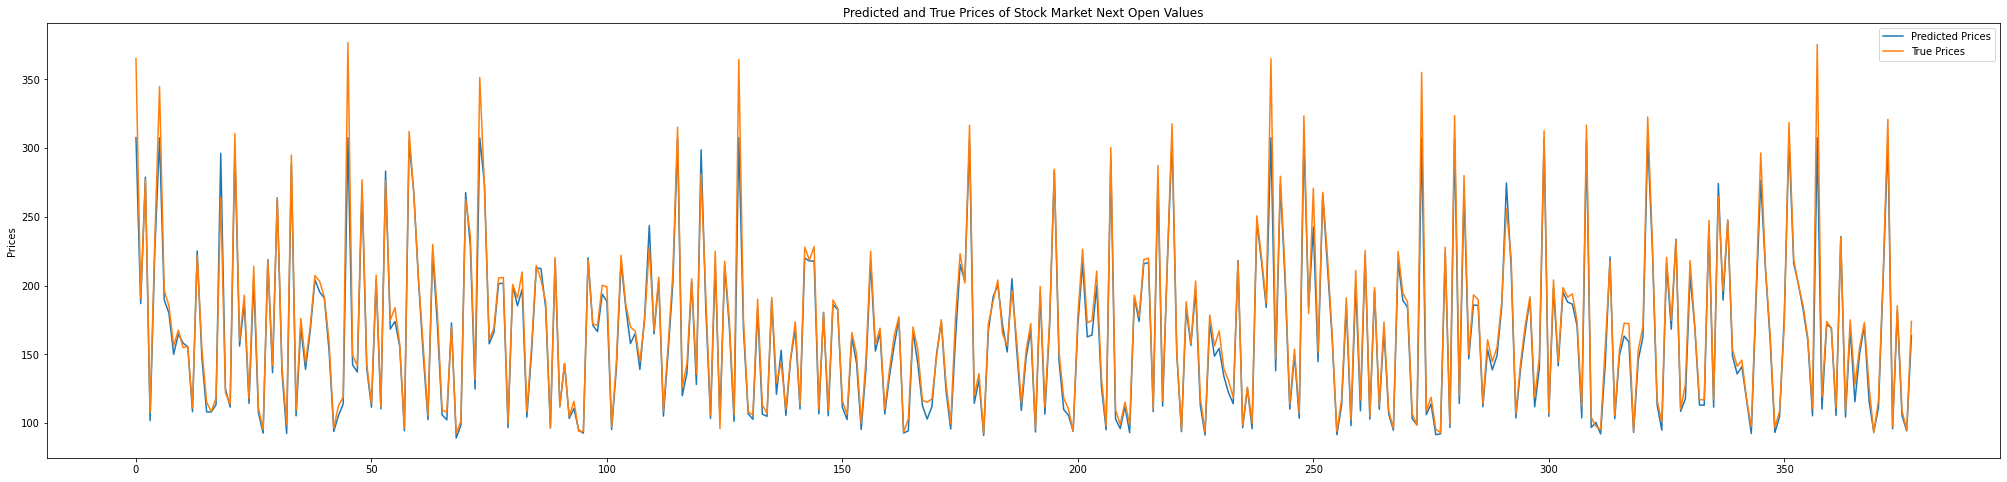

In [ ]:
plt.figure(figsize = (35,8))
plt.plot(test.index, predicted_prices)
plt.plot(test.index, test_y)
plt.legend(['Predicted Prices', 'True Prices'])
plt.ylabel('Prices')
plt.title('Predicted and True Prices of Stock Market Next Open Values')